# human vs zero shot vs few shot for a single video

  Evaluation parameters  Human  zeroshot  fewshot
0             Relevance      7       6.2      6.7
1               Clarity      8       8.0      7.8
2           Correctness      6       5.5      5.7
3    Structured Answers      8       7.6      7.7
4               Fluency      7       6.5      6.7
5       Professionalism      8       7.5      7.6
6            No Fillers      8       7.6      7.8
7               Focused      8       7.4      7.8
8             Authentic      8       7.3      7.7
9               Overall      8       7.2      7.7


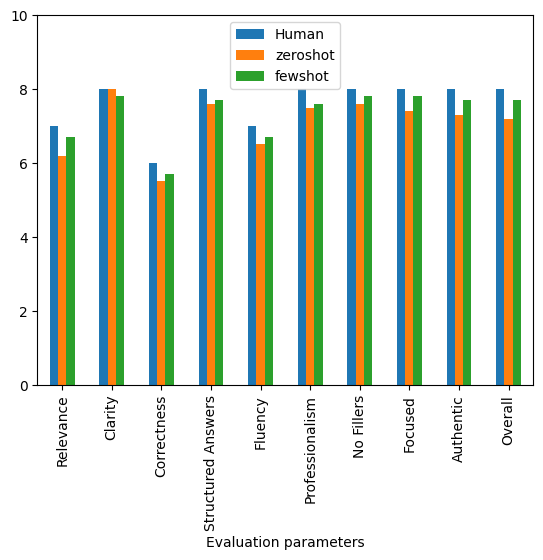

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame([['Relevance', 7, 6.2], ['Clarity', 8, 8.0],
                  ['Correctness', 6, 5.5], ['Structured Answers', 8, 7.6],
                   ['Fluency', 7, 6.5], ['Professionalism', 8, 7.5],
                   ['No Fillers', 8, 7.6], ['Focused', 8, 7.4],
                   ['Authentic', 8, 7.3], ['Overall', 8, 7.2]],
                  columns=['Evaluation parameters', 'Human', 'zeroshot'])

# Adding a 'fewshot'
df['fewshot'] = [6.7, 7.8, 5.7, 7.7, 6.7, 7.6, 7.8, 7.8, 7.7, 7.7]
print(df)

# Grouped bar chart
df.plot(x='Evaluation parameters',
        kind='bar',
        stacked=False,
        ylim=(0, 10))

# plt.title('Human vs. AI: Detailed Interview Response Evaluation and Average Scores')
plt.show()


# Correlation between human and zeroshot vs fewshot for all videos


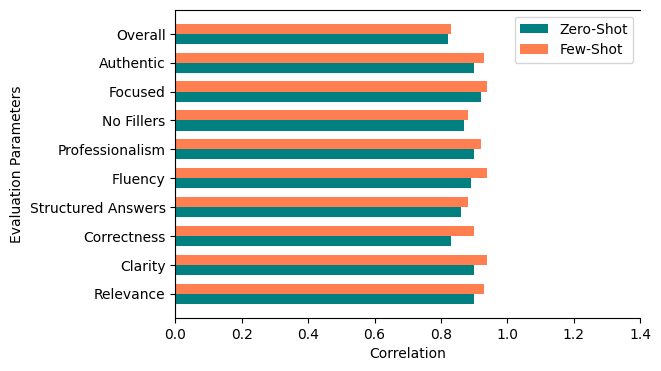

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame creation
df = pd.DataFrame([['Relevance', 0.90], ['Clarity', 0.90],
                   ['Correctness', 0.83], ['Structured Answers', 0.86],
                   ['Fluency', 0.89], ['Professionalism', 0.90],
                   ['No Fillers', 0.87], ['Focused', 0.92],
                   ['Authentic', 0.90], ['Overall', 0.82]],
                  columns=['parameters', 'average_zeroshot_correlation'])
df['average_fewshot_correlation'] = [0.93, 0.94, 0.90, 0.88, 0.94, 0.92, 0.88, 0.94, 0.93, 0.83]

# Plotting
plt.figure(figsize=(6, 4))

# Creating a grouped bar chart with professional colors
bar_width = 0.35
index = range(len(df))

bars1 = plt.barh([i - bar_width/2 for i in index], df['average_zeroshot_correlation'],
                 height=bar_width, color='#008080', label='Zero-Shot')  # Teal
bars2 = plt.barh([i + bar_width/2 for i in index], df['average_fewshot_correlation'],
                 height=bar_width, color='#FF7F50', label='Few-Shot')  # Coral

# Adding labels
plt.xlabel('Correlation')
plt.ylabel('Evaluation Parameters')
# plt.title('Comparison of Zero-Shot and Few-Shot Correlations')

plt.yticks(index, df['parameters'])

# Set the limit for the x-axis
plt.xlim(0, 1.4)

# Add vertical line at x=0
plt.axvline(x=0, color='grey', linewidth=0.8)

# Move the spines
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['right'].set_color('none')

# Add legends
plt.legend()

# Show the plot
plt.show()


#Heatmap

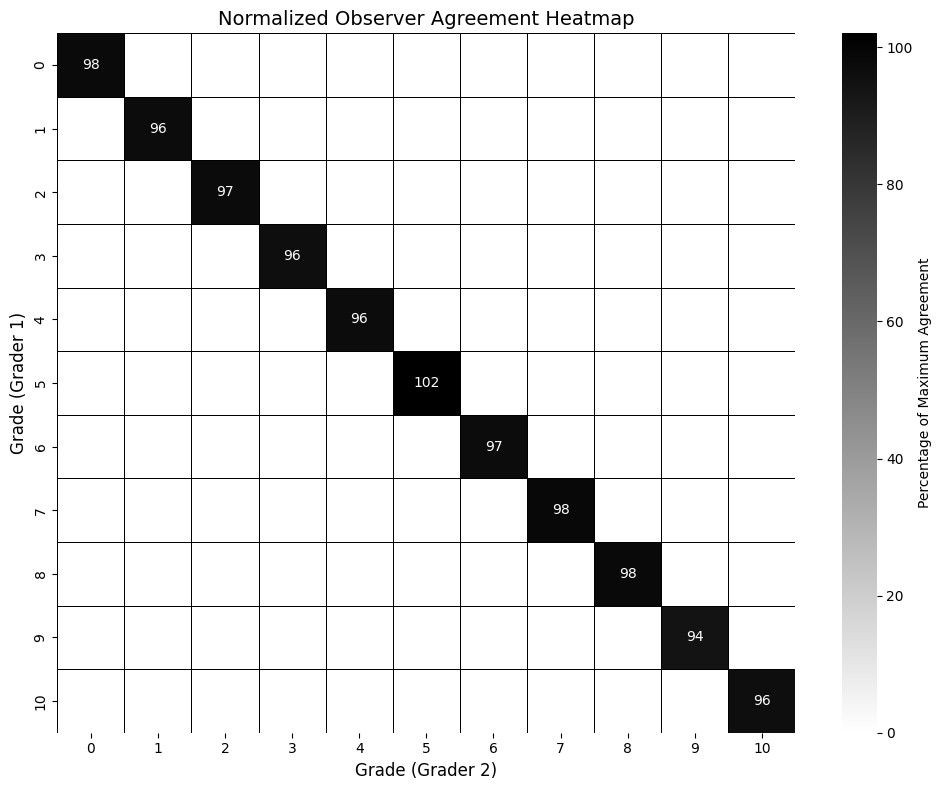

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Define data
grades = list(range(11))
max_possible_agreement = np.array([500, 320, 410, 260, 330, 490, 180, 430, 290, 90, 140])
observed_agreement = np.array([490, 310, 400, 250, 320, 500, 175, 425, 285, 85, 135])
grader1_agreement = np.array([500, 320, 410, 260, 330, 490, 180, 430, 290, 90, 140])
grader2_agreement = np.array([490, 310, 400, 250, 320, 500, 175, 425, 285, 85, 135])

matrix_size = len(grades)
matrix = np.zeros((matrix_size, matrix_size))

# Fill matrix with observed agreements
for i in range(matrix_size):
    matrix[i, i] = observed_agreement[i]

# Normalize matrix
normalized_matrix = matrix / max_possible_agreement[:, None] * 100

# Create a colormap
cmap = mcolors.LinearSegmentedColormap.from_list("black_white", ["white", "black"])
annotations = np.where(normalized_matrix == 0, "", normalized_matrix.astype(int).astype(str))

# Create DataFrame
df_matrix = pd.DataFrame(normalized_matrix, index=grades, columns=grades)

# Plotting
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df_matrix, annot=annotations, fmt="", cmap=cmap,
                 cbar_kws={'label': 'Percentage of Maximum Agreement'},
                 xticklabels=grades, yticklabels=grades, linewidths=0.5, linecolor='black')

ax.set_xlabel('Grade (Grader 2)', fontsize=12)
ax.set_ylabel('Grade (Grader 1)', fontsize=12)
ax.set_title('Normalized Observer Agreement Heatmap', fontsize=14)

plt.tight_layout()
plt.show()


# Cohen's Kappa statistic (IAA) for each grade.

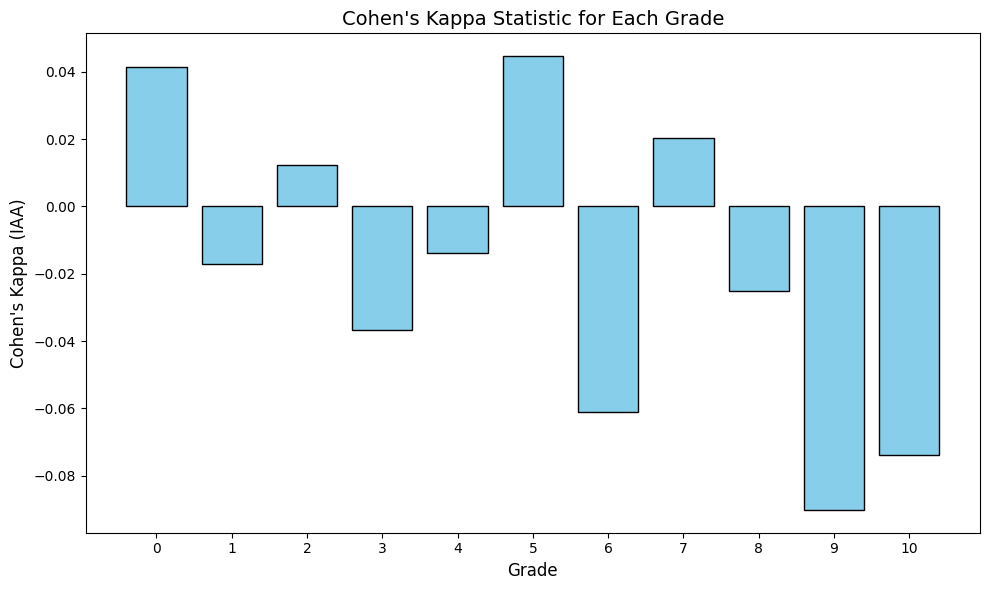

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
grades = list(range(11))
max_possible_agreement = np.array([500, 320, 410, 260, 330, 490, 180, 430, 290, 90, 140])
observed_agreement = np.array([490, 310, 400, 250, 320, 500, 175, 425, 285, 85, 135])
grader1_agreement = np.array([500, 320, 410, 260, 330, 490, 180, 430, 290, 90, 140])
grader2_agreement = np.array([490, 310, 400, 250, 320, 500, 175, 425, 285, 85, 135])

# Compute marginal probabilities
total_items = np.sum(max_possible_agreement)
p1 = grader1_agreement / total_items
p2 = grader2_agreement / total_items

# Calculate expected agreement
p_e = np.sum(p1 * p2)

# Calculate observed agreement
p_o = observed_agreement / total_items

# Calculate Cohen's Kappa
kappa = (p_o - p_e) / (1 - p_e)

# Create DataFrame for plotting
data = {
    'Grade': grades,
    'Cohen\'s Kappa (IAA)': kappa
}
df = pd.DataFrame(data)

# Plot Cohen's Kappa
plt.figure(figsize=(10, 6))

# Bar plot
plt.bar(df['Grade'], df['Cohen\'s Kappa (IAA)'], color='skyblue', edgecolor='black')
plt.xticks(df['Grade'], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Cohen\'s Kappa (IAA)', fontsize=12)
plt.title('Cohen\'s Kappa Statistic for Each Grade', fontsize=14)

plt.tight_layout()
plt.show()
